**Machine Learning algorithms for MIT-BIH dataset:**

**Imports**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import csv
import itertools
import collections

import pywt
from scipy import stats

from sklearn.utils import resample
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical

%matplotlib inline

**matplotlib Settings**

In [ ]:
plt.rcParams["figure.figsize"] = (30,6)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True

**Methods Definitions**

In [ ]:
def denoise(data):
    w = pywt.Wavelet('sym4')
    maxlev = pywt.dwt_max_level(len(data), w.dec_len)
    threshold = 0.04 # Threshold for filtering

    coeffs = pywt.wavedec(data, 'sym4', level=maxlev)
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))

    datarec = pywt.waverec(coeffs, 'sym4')

    return datarec

**Variables Definitions**

In [ ]:
path = '/content/drive/MyDrive/data_mit/'
window_size = 180
maximum_counting = 10000

classes = ['N', 'L', 'R', 'A', 'V']
n_classes = len(classes)
count_classes = [0]*n_classes

X = list()
y = list()

**Prepare Input Files**

In [ ]:
filenames = next(os.walk(path))[2]

records = list()
annotations = list()
filenames.sort()

In [ ]:
for f in filenames:
    filename, file_extension = os.path.splitext(f)

    if(file_extension == '.csv'):
        records.append(path + filename + file_extension)

    else:
        annotations.append(path + filename + file_extension)

**Data Extraction and Preprocessing**

<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:47: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:47: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-7-818e2cf6d77e>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:
<ipython-input-7-818e2cf6d77e>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:
<ipython-input-7-818e2cf6d77e>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1:
<ipython-input-7-818e2cf6d77e>:47: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if r is 1 and not example_beat_printed:


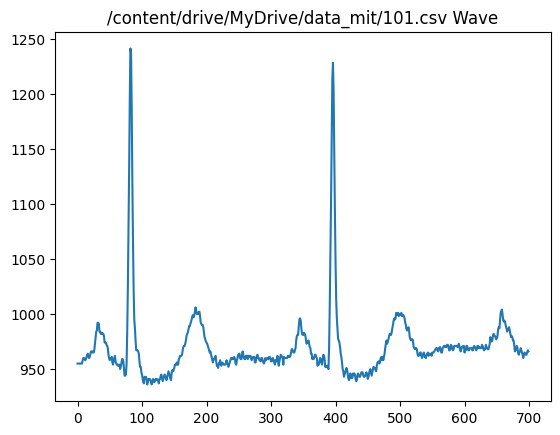

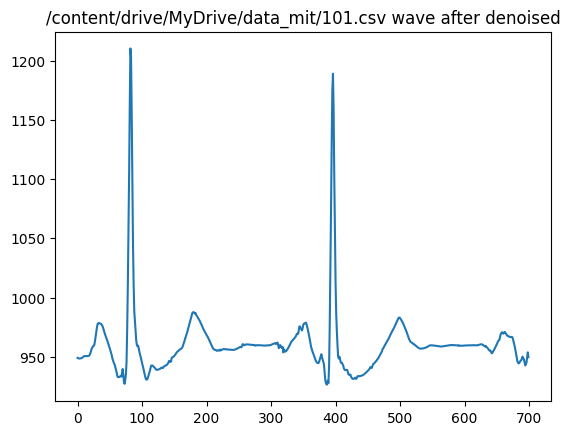

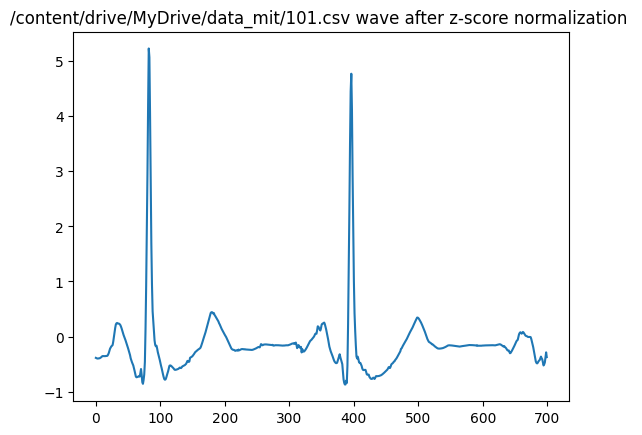

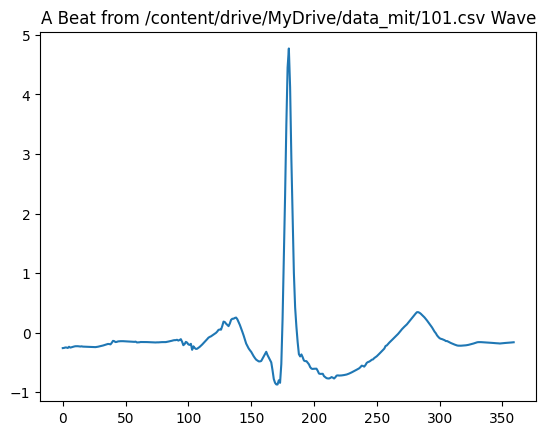

(100012, 360) (100012,)


In [ ]:
for r in range(0,len(records)):
    signals = []

    with open(records[r], 'rt') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file\
        row_index = -1
        for row in spamreader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1

    if r is 1:
        plt.title(records[1] + " Wave")
        plt.plot(signals[0:700])
        plt.show()

    signals = denoise(signals)
    if r is 1:
        plt.title(records[1] + " wave after denoised")
        plt.plot(signals[0:700])
        plt.show()

    signals = stats.zscore(signals)
    if r is 1:
        plt.title(records[1] + " wave after z-score normalization ")
        plt.plot(signals[0:700])
        plt.show()

    example_beat_printed = False
    with open(annotations[r], 'r') as fileID:
        data = fileID.readlines()
        beat = list()

        for d in range(1, len(data)):
            splitted = data[d].split(' ')
            splitted = filter(None, splitted)
            next(splitted)
            pos = int(next(splitted))
            arrhythmia_type = next(splitted)
            if(arrhythmia_type in classes):
                arrhythmia_index = classes.index(arrhythmia_type)

                count_classes[arrhythmia_index] += 1
                if(window_size <= pos and pos < (len(signals) - window_size)):
                    beat = signals[pos-window_size:pos+window_size]

                    if r is 1 and not example_beat_printed:
                        plt.title("A Beat from " + records[1] + " Wave")
                        plt.plot(beat)
                        plt.show()
                        example_beat_printed = True

                    X.append(beat)
                    y.append(arrhythmia_index)

print(np.shape(X), np.shape(y))

In [ ]:
for i in range(0,len(X)):
        X[i] = np.append(X[i], y[i])

print(np.shape(X))

(100012, 361)


**Classes Distribution**

In [ ]:
X_train_df = pd.DataFrame(X)
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class)

**Rebalancing Classes**

In [ ]:
df_1=X_train_df[X_train_df[X_train_df.shape[1]-1]==1]
df_2=X_train_df[X_train_df[X_train_df.shape[1]-1]==2]
df_3=X_train_df[X_train_df[X_train_df.shape[1]-1]==3]
df_4=X_train_df[X_train_df[X_train_df.shape[1]-1]==4]

df_0=(X_train_df[X_train_df[X_train_df.shape[1]-1]==0]).sample(n=5000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=5000,random_state=122)
df_2_upsample=resample(df_2,replace=True,n_samples=5000,random_state=123)
df_3_upsample=resample(df_3,replace=True,n_samples=5000,random_state=124)
df_4_upsample=resample(df_4,replace=True,n_samples=5000,random_state=125)

X_train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [ ]:
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class)

**Train-Test Split**

In [ ]:
train, test = train_test_split(X_train_df, test_size=0.20)

print("X_train : ", np.shape(train))
print("X_test  : ", np.shape(test))

X_train :  (20000, 361)
X_test  :  (5000, 361)


In [ ]:
target_train=train[train.shape[1]-1]
target_test=test[test.shape[1]-1]
train_y=to_categorical(target_train)
test_y=to_categorical(target_test)
print(np.shape(train_y), np.shape(test_y))

(20000, 5) (5000, 5)


In [ ]:
train_x = train.iloc[:,:train.shape[1]-1].values
test_x = test.iloc[:,:test.shape[1]-1].values
train_x = train_x.reshape(len(train_x), train_x.shape[1],1)
test_x = test_x.reshape(len(test_x), test_x.shape[1],1)
print(np.shape(train_x), np.shape(test_x))

(20000, 360, 1) (5000, 360, 1)


In [ ]:
nsamples, nx, ny = train_x.shape
d2_train_x = train_x.reshape((nsamples,nx*ny))

**Encoding labels properly for use in classifiers**

In [ ]:
def label_encoder(array):
    rows, cols = array.shape
    label = np.zeros(rows)
    rows, cols = array.shape
    for i in range(rows):
        for j in range(cols):
            if(array[i][j] == 1):
                label[i] = j

    return label

In [ ]:
d1_train_y = label_encoder(train_y)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(d2_train_x,d1_train_y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
d1_test_y = label_encoder(test_y)

In [ ]:
nsamples, nx, ny = test_x.shape
d2_test_x = test_x.reshape((nsamples,nx*ny))

In [ ]:
pred = model.predict(d2_test_x)

In [ ]:
from sklearn import metrics

print(metrics.accuracy_score(d1_test_y, pred))

0.9722


In [ ]:
from sklearn import metrics

print(metrics.confusion_matrix(d1_test_y, pred))
print(metrics.classification_report(d1_test_y, pred))

[[ 983    5   14   30    5]
 [   3  977    0    0    4]
 [   6    2  933    2    0]
 [  25    1    7  960    4]
 [  20    5    5    1 1008]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1037
         1.0       0.99      0.99      0.99       984
         2.0       0.97      0.99      0.98       943
         3.0       0.97      0.96      0.96       997
         4.0       0.99      0.97      0.98      1039

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



**SVM**

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf')
svc.fit(d2_train_x, d1_train_y)

SVC()

In [ ]:
pred1 = svc.predict(d2_test_x)

In [ ]:
print(metrics.accuracy_score(d1_test_y, pred1))

0.9618


In [ ]:
print(metrics.confusion_matrix(d1_test_y, pred1))
print(metrics.classification_report(d1_test_y, pred1))

[[1003    9    1   19    5]
 [   7  971    0    0    6]
 [  15    0  927    0    1]
 [  74    1    9  907    6]
 [  26    7    3    2 1001]]
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      1037
         1.0       0.98      0.99      0.98       984
         2.0       0.99      0.98      0.98       943
         3.0       0.98      0.91      0.94       997
         4.0       0.98      0.96      0.97      1039

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(d2_train_x, d1_train_y)

RandomForestClassifier()

In [ ]:
pred2 = rf.predict(d2_test_x)

In [ ]:
print(metrics.accuracy_score(d1_test_y, pred2))

0.9824


In [ ]:
print(metrics.confusion_matrix(d1_test_y, pred2))
print(metrics.classification_report(d1_test_y, pred2))

[[1011    2    5   14    5]
 [  11  970    0    0    3]
 [   8    0  933    2    0]
 [  12    0    1  981    3]
 [  16    2    3    1 1017]]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      1037
         1.0       1.00      0.99      0.99       984
         2.0       0.99      0.99      0.99       943
         3.0       0.98      0.98      0.98       997
         4.0       0.99      0.98      0.98      1039

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(d2_train_x, d1_train_y)

GaussianNB()

In [ ]:
pred3 = gnb.predict(d2_test_x)

In [ ]:
print(metrics.accuracy_score(d1_test_y, pred3))

0.6696


In [ ]:
print(metrics.confusion_matrix(d1_test_y, pred3))
print(metrics.classification_report(d1_test_y, pred3))

[[606  93 219  66  53]
 [ 79 762  49  31  63]
 [ 17 104 738  45  39]
 [ 89  18 172 592 126]
 [ 34 192  26 137 650]]
              precision    recall  f1-score   support

         0.0       0.73      0.58      0.65      1037
         1.0       0.65      0.77      0.71       984
         2.0       0.61      0.78      0.69       943
         3.0       0.68      0.59      0.63       997
         4.0       0.70      0.63      0.66      1039

    accuracy                           0.67      5000
   macro avg       0.68      0.67      0.67      5000
weighted avg       0.68      0.67      0.67      5000



In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(d2_train_x, d1_train_y)
pred4 = dt.predict(d2_test_x)

In [ ]:
print(metrics.accuracy_score(d1_test_y, pred4))

0.944


In [ ]:
print(metrics.confusion_matrix(d1_test_y, pred4))
print(metrics.classification_report(d1_test_y, pred4))

[[912  25  19  49  32]
 [ 16 956   3   2   7]
 [ 14   4 900  20   5]
 [ 19   2   8 960   8]
 [ 10  20   6  11 992]]
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      1037
         1.0       0.95      0.97      0.96       984
         2.0       0.96      0.95      0.96       943
         3.0       0.92      0.96      0.94       997
         4.0       0.95      0.95      0.95      1039

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(d2_train_x)
X_test = pca.transform(d2_test_x)

explained_variance = pca.explained_variance_ratio_

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter = 5000, random_state = 0)
classifier.fit(X_train, d1_train_y)

LogisticRegression(max_iter=5000, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(metrics.accuracy_score(d1_test_y, y_pred))

0.2042


In [ ]:
print(metrics.confusion_matrix(d1_test_y, y_pred))
print(metrics.classification_report(d1_test_y, y_pred))

[[303 219 253 154 108]
 [512  51  62 216 143]
 [141 117 165 335 185]
 [ 60 131 124 413 269]
 [514  31  24 381  89]]
              precision    recall  f1-score   support

         0.0       0.20      0.29      0.24      1037
         1.0       0.09      0.05      0.07       984
         2.0       0.26      0.17      0.21       943
         3.0       0.28      0.41      0.33       997
         4.0       0.11      0.09      0.10      1039

    accuracy                           0.20      5000
   macro avg       0.19      0.20      0.19      5000
weighted avg       0.19      0.20      0.19      5000



In [ ]:
from sklearn.svm import LinearSVC

lsvm = LinearSVC(random_state=0, tol=1e-5)
lsvm.fit(d2_train_x, d1_train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

In [ ]:
pred5 = dt.predict(d2_test_x)

In [ ]:
print(metrics.accuracy_score(d1_test_y, pred5))

0.944


In [ ]:
print(metrics.confusion_matrix(d1_test_y, pred5))
print(metrics.classification_report(d1_test_y, pred5))

[[912  25  19  49  32]
 [ 16 956   3   2   7]
 [ 14   4 900  20   5]
 [ 19   2   8 960   8]
 [ 10  20   6  11 992]]
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      1037
         1.0       0.95      0.97      0.96       984
         2.0       0.96      0.95      0.96       943
         3.0       0.92      0.96      0.94       997
         4.0       0.95      0.95      0.95      1039

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train = lda.fit_transform(d2_train_x, d1_train_y)
X_test = lda.transform(d2_test_x)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter = 5000, random_state = 0)
classifier.fit(X_train, d1_train_y)

LogisticRegression(max_iter=5000, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(metrics.accuracy_score(d1_test_y, y_pred))

0.6742


In [ ]:
print(metrics.confusion_matrix(d1_test_y, y_pred))
print(metrics.classification_report(d1_test_y, y_pred))

[[577  94  64 263  39]
 [129 576   3   0 276]
 [ 28   7 866  41   1]
 [203  19  65 708   2]
 [ 97 275  20   3 644]]
              precision    recall  f1-score   support

         0.0       0.56      0.56      0.56      1037
         1.0       0.59      0.59      0.59       984
         2.0       0.85      0.92      0.88       943
         3.0       0.70      0.71      0.70       997
         4.0       0.67      0.62      0.64      1039

    accuracy                           0.67      5000
   macro avg       0.67      0.68      0.68      5000
weighted avg       0.67      0.67      0.67      5000



In [ ]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2)
X_train = ica.fit_transform(d2_train_x, d1_train_y)
X_test = ica.transform(d2_test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter = 5000, random_state = 0)
classifier.fit(X_train, d1_train_y)

LogisticRegression(max_iter=5000, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(metrics.accuracy_score(d1_test_y, y_pred))

0.2158


In [ ]:
print(metrics.confusion_matrix(d1_test_y, y_pred))
print(metrics.classification_report(d1_test_y, y_pred))

[[  3 299 642  83  10]
 [ 74 247 417 212  34]
 [  2 216 520 195  10]
 [  6 288 402 287  14]
 [349 126 142 400  22]]
              precision    recall  f1-score   support

         0.0       0.01      0.00      0.00      1037
         1.0       0.21      0.25      0.23       984
         2.0       0.24      0.55      0.34       943
         3.0       0.24      0.29      0.26       997
         4.0       0.24      0.02      0.04      1039

    accuracy                           0.22      5000
   macro avg       0.19      0.22      0.17      5000
weighted avg       0.19      0.22      0.17      5000

